<a href="https://colab.research.google.com/github/Umamcode/Data-Mining-Umam/blob/Praktikum-10/Tugas_Praktikum_10_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Semester3/Peminatan/Data_Mining/Dataset/'

Mounted at /content/drive


In [4]:
import pandas as pd
df = pd.read_csv(path + 'gym_members_exercise_tracking.csv',sep = ',')
# df.rename(columns ={'num_bedrooms':'jum_kamar'}, inplace=True)
# df.rename(columns ={'num_bathrooms':'jum_kamarmandi'}, inplace=True)
# df.rename(columns ={'house_size':'luas_rumah'}, inplace=True)
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [5]:
# menghitung jumlah null
df.isnull().sum()

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


                                    Age  Weight (kg)  Height (m)   Max_BPM  \
Age                            1.000000    -0.036340   -0.027837 -0.017073   
Weight (kg)                   -0.036340     1.000000    0.365321  0.057061   
Height (m)                    -0.027837     0.365321    1.000000 -0.017660   
Max_BPM                       -0.017073     0.057061   -0.017660  1.000000   
Avg_BPM                        0.035969     0.009717   -0.014776 -0.039751   
Resting_BPM                    0.004354    -0.032138   -0.005090  0.036647   
Session_Duration (hours)      -0.019912    -0.013666   -0.010206  0.010051   
Calories_Burned               -0.154679     0.095443    0.086348  0.002090   
Fat_Percentage                 0.002370    -0.225512   -0.235521 -0.009056   
Water_Intake (liters)          0.041528     0.394276    0.393533  0.031621   
Workout_Frequency (days/week)  0.008055    -0.011769   -0.011270 -0.029099   
Experience_Level              -0.018676     0.003379   -0.010267

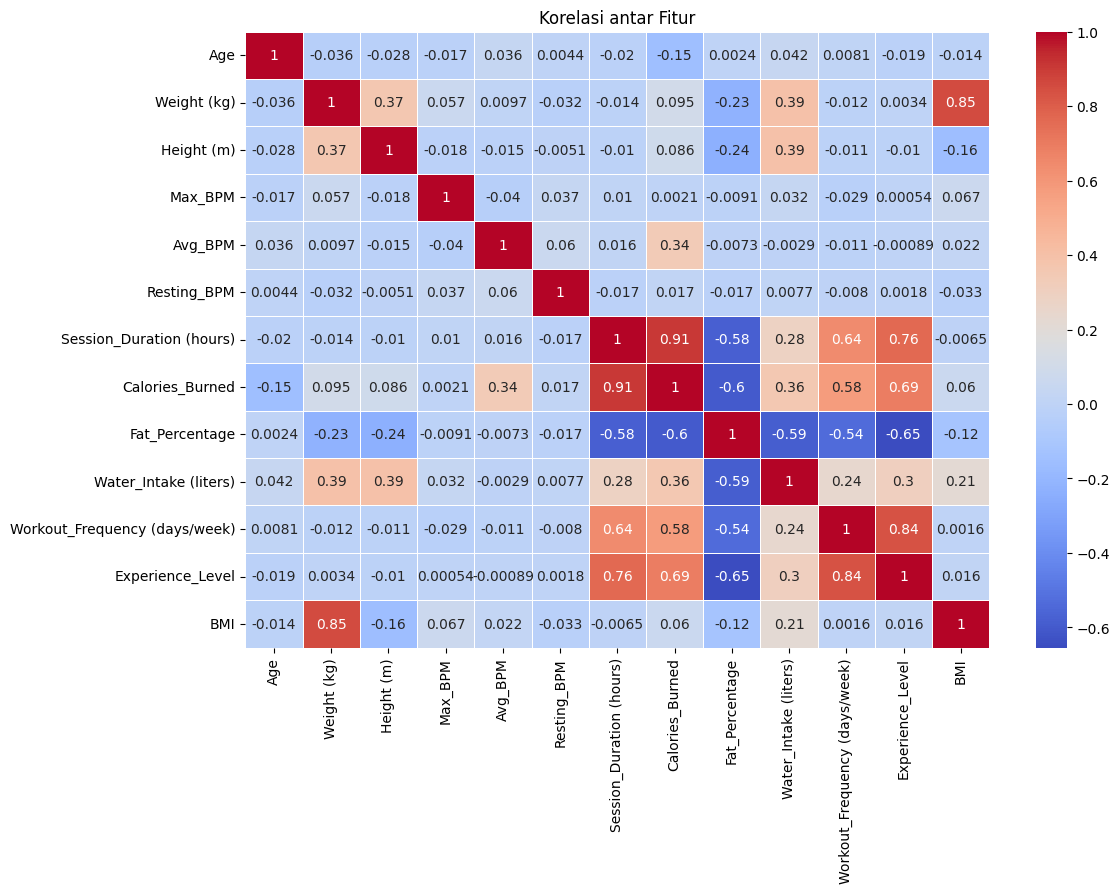

In [6]:
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=".5")
plt.title("Korelasi antar Fitur")
print(correlation_matrix)
plt.show()

In [9]:
import statsmodels.api as sm

# Standarisasi data
x = df[["Session_Duration (hours)", "Workout_Frequency (days/week)", "Water_Intake (liters)"]]
y = df["Calories_Burned"]

# Tambahkan konstanta
x_scaled = sm.add_constant(x)

# Buat model OLS
model_prediksi = sm.OLS(y, x).fit()
print(model_prediksi.summary())


                                 OLS Regression Results                                
Dep. Variable:        Calories_Burned   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          2.283e+04
Date:                Thu, 26 Dec 2024   Prob (F-statistic):                        0.00
Time:                        15:30:11   Log-Likelihood:                         -5969.5
No. Observations:                 973   AIC:                                  1.195e+04
Df Residuals:                     970   BIC:                                  1.196e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------